In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Circle
import os.path
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split


# Custom modules
from modules import voiddetect as vd
from modules import select_voidboundaries as sel
from modules import void_analysis as voidanlys
from modules import gbvoid_dataset as gbvoid

In [3]:
#class GB:
    #__init__(self, x):
        #self.x = x
        
    #func computeEnergy():
        #return x*2
        
#mygb = GB(x=3)

#mygb.computeEnergy()

In [18]:
# DATA

inputs = ['1_001', '1_002', '1_003', '1_004', '1_005', '1_006', '1_007', '1_008', '1_009', '1_010',
          '2_001', '2_002', '2_003', '2_004', '2_005', '2_006', '2_007', '2_008', '2_009',
          '3_001', '3_002', '3_003', '3_004', '3_005', '3_006', '3_007', '3_008', '3_009', '3_010',
          '4_001', '4_002', '4_003', '4_004', '4_005', '4_007', '4_008', '4_009',
          '5_001', '5_002', '5_003', '5_004', '5_005', '5_006', '5_007', '5_008', '5_009', '5_010', '5_011',
          '6_001', '6_002', '6_003', '6_004', '6_005', '6_006', '6_007', '6_008', '6_009']

columns_void=['phi1_right','PHI_right','phi2_right','phi1_left','PHI_left','phi2_left',
         'Misorientation Angle','Mis. X in Right Hand Grain','Mis. Y in Right Hand Grain', 'Mis. Z in Right Hand Grain',
         'Mis. X in Right Hand Grain','Mis. Y in Right Hand Grain','Mis. Z in Right Hand Grain',
         'Lenght','Trace', 'X start', 'Y start', 'X end','Y end','ID Right Grain', 'ID Left Grain', 'Void']

columns_drop=['ID Right Grain','ID Left Grain']

# Collect all txt data
data=[]
for name in inputs:
    void_dataset_temp = gbvoid.gbvoid_dataset(name)
    data.append(void_dataset_temp)
void_dataset=pd.concat(data, ignore_index='True')
void_dataset.columns=columns_void

# Drop ID grain form the dataset
void_dataset=void_dataset.drop(columns_drop, axis=1)

In [19]:
X = void_dataset.iloc[:,:-1].values
Y = void_dataset.iloc[:,-1].values

In [20]:
void_dataset.groupby('Void').mean()

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Mis. X in Right Hand Grain,Mis. Y in Right Hand Grain,Mis. Z in Right Hand Grain,Mis. X in Right Hand Grain,Mis. Y in Right Hand Grain,Mis. Z in Right Hand Grain,Lenght,Trace,X start,Y start,X end,Y end
Void,,,,,,,,,,,,,,,,,,,
0.0,2.993564,0.541945,3.291484,2.990680,0.540680,3.294596,38.734457,-0.037573,-0.056270,0.010905,-0.037573,-0.056270,0.010905,15.528026,94.717469,485.562862,524.841783,496.882544,525.504727
1.0,3.002167,0.553098,3.235250,3.074689,0.556421,3.180379,36.208050,-0.095503,-0.277413,0.203133,-0.095503,-0.277413,0.203133,14.812751,95.769378,471.294088,481.898979,482.550783,482.651475


In [21]:
selected_void_dataset=void_dataset.loc[void_dataset['Void'] == 1.0]
# Drop Void grain form the selected dataset
selected_void_dataset=selected_void_dataset.drop(['Void'], axis=1)

selected_dataset=void_dataset.loc[void_dataset['Void'] == 1.0]
# Drop Void grain form the selected dataset
selected_dataset=selected_dataset.drop(['Void'], axis=1)

In [22]:
selected_dataset

,phi1_right,PHI_right,phi2_right,phi1_left,PHI_left,phi2_left,Misorientation Angle,Mis. X in Right Hand Grain,Mis. Y in Right Hand Grain,Mis. Z in Right Hand Grain,Mis. X in Right Hand Grain,Mis. Y in Right Hand Grain,Mis. Z in Right Hand Grain,Lenght,Trace,X start,Y start,X end,Y end
305,2.403,0.369,4.287,0.078,0.473,5.957,54.94,-21.0,8.0,16.0,-21.0,8.0,16.0,18.583,23.8,37.0,643.75,54.0,636.24
341,5.850,0.894,0.879,0.078,0.473,5.957,53.08,-2.0,-12.0,-17.0,-2.0,-12.0,-17.0,8.327,136.1,46.0,622.38,52.0,628.16
356,0.078,0.473,5.957,5.587,0.991,0.932,54.49,-9.0,19.0,-18.0,-9.0,19.0,-18.0,8.327,103.9,52.0,628.16,54.0,636.24
431,5.850,0.894,0.879,2.403,0.369,4.287,49.55,19.0,17.0,-15.0,19.0,17.0,-15.0,11.719,159.8,72.0,646.63,83.0,650.67
2017,2.275,0.254,3.992,5.511,0.911,0.961,55.19,-7.0,-11.0,-12.0,-7.0,-11.0,-12.0,28.095,175.3,474.0,767.88,502.0,770.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196230,4.895,0.422,1.825,0.573,0.634,5.168,48.82,22.0,4.0,-15.0,22.0,4.0,-15.0,18.583,156.2,526.0,1211.28,543.0,1218.79
196238,5.783,0.683,0.065,5.730,0.685,0.302,11.39,1.0,5.0,-30.0,1.0,5.0,-30.0,5.292,79.1,528.0,1206.66,529.0,1201.47
196261,4.895,0.422,1.825,2.106,0.776,4.253,28.33,17.0,22.0,3.0,17.0,22.0,3.0,15.011,30.0,532.0,1203.20,545.0,1195.69
197030,2.150,0.391,4.388,2.355,0.458,4.207,6.18,19.0,-5.0,-1.0,19.0,-5.0,-1.0,9.019,116.3,719.0,144.91,723.0,153.00


In [24]:
selected_dataset[['Trace']]

,Trace
305,23.8
341,136.1
356,103.9
431,159.8
2017,175.3
...,...
196230,156.2
196238,79.1
196261,30.0
197030,116.3


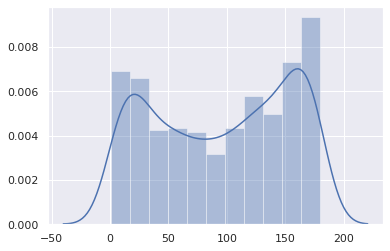

In [28]:
sns.set()
sns.distplot(selected_dataset[['Trace']]);

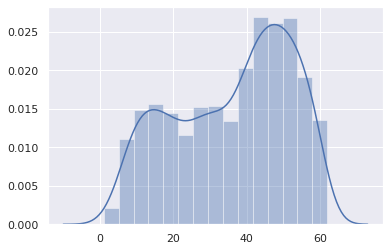

In [29]:
sns.distplot(selected_dataset[['Misorientation Angle']]);

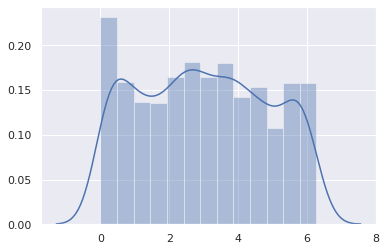

In [30]:
sns.distplot(selected_dataset[['phi1_right']]);

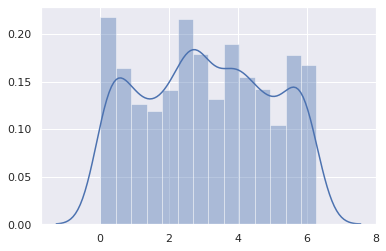

In [31]:
sns.distplot(selected_dataset[['phi1_left']]);

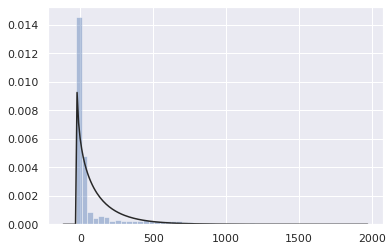

In [33]:
sns.distplot(selected_dataset, kde=False, fit=stats.gamma);

In [34]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(selected_dataset, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

NameError: name 'linear_model' is not defined